In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# from nufit 5.3 http://www.nu-fit.org/?q=node/278

# normal ordering, degrees, eV^2, symmetrized errors, 3l = 31 for NO, 3l = 32 for IO

# degrees
theta12 = 33.68
theta12_err = 0.5*(0.73+0.70)
theta23 = 43.3
theta23_err = 0.5*(1.0+0.8)
theta13 = 8.56
theta13_err = 0.5*(0.11+0.11)
deltaCP = 212
deltaCP_err = 0.5*(26+41)
# eV^2
delta2_m21 = 7.49e-5
delta2_m21_err = 0.5*(0.19+0.19)*1e-5
delta2_m3l = 2.513e-3
delta2_m3l_err = 0.5*(0.021+0.019)*1e-3

# inverted ordering

# degrees
theta12_inv = 33.68
theta12_inv_err = 0.5*(0.73+0.70)
theta23_inv = 47.9
theta23_inv_err = 0.5*(0.7+0.9)
theta13_inv = 8.59
theta13_inv_err = 0.5*(0.11+0.11)
deltaCP_inv = 274
deltaCP_inv_err = 0.5*(22+25)
# eV^2
delta2_m21_inv = 7.49e-5
delta2_m21_inv_err = 0.5*(0.19+0.19)*1e-5
delta2_m3l_inv = -2.484e-3
delta2_m3l_inv_err = 0.5*(0.020+0.020)*1e-3

theta12 = np.radians(theta12)
theta12_err = np.radians(theta12_err)
theta23 = np.radians(theta23)
theta23_err = np.radians(theta23_err)
theta13 = np.radians(theta13)
theta13_err = np.radians(theta13_err)
deltaCP = np.radians(deltaCP)
deltaCP_err = np.radians(deltaCP_err)

theta12_inv = np.radians(theta12_inv)
theta12_inv_err = np.radians(theta12_inv_err)
theta23_inv = np.radians(theta23_inv)
theta23_inv_err = np.radians(theta23_inv_err)
theta13_inv = np.radians(theta13_inv)
theta13_inv_err = np.radians(theta13_inv_err)
deltaCP_inv = np.radians(deltaCP_inv)
deltaCP_inv_err = np.radians(deltaCP_inv_err)


def get_PMNS(theta12, theta23, theta13, deltaCP, alpha1, alpha2):

    rot_23 = np.array([[
        [1, 0, 0],
        [0, np.cos(theta23), np.sin(theta23)],
        [0, -np.sin(theta23), np.cos(theta23)]
        ]])

    rot_13 = np.array([[
        [np.cos(theta13), 0, np.sin(theta13)*np.exp(-1j*deltaCP)],
        [0, 1, 0],
        [-np.sin(theta13)*np.exp(1j*deltaCP), 0, np.cos(theta13)]
        ]])

    rot_12 = np.array([[
        [np.cos(theta12), np.sin(theta12), 0],
        [-np.sin(theta12), np.cos(theta12), 0],
        [0, 0, 1]
        ]])
    
    majorana = np.diag([np.exp(1j*alpha1), np.exp(1j*alpha2), 1])

    return (rot_23 @ rot_13 @ rot_12 @ majorana)[0]


# todo: expand PMNS with sterile neutrino here


In [3]:
alpha1 = 0
alpha2 = 0

U_mat = get_PMNS(theta12, theta23, theta13, deltaCP, alpha1, alpha2)

U = {}
for flavor_i in range(3):
    flavor = ["nue", "numu", "nutau"][flavor_i]
    for mass_i in range(3):
        U[(flavor, mass_i)] = U_mat[flavor_i, mass_i]


In [4]:
# assuming normal ordering, setting m1 = 0
m1 = 0
m2 = np.sqrt(delta2_m21)
m3 = np.sqrt(delta2_m3l)

c = 299792458 # m / s
hbar = 6.582119569e-16 # eV s

# from https://en.wikipedia.org/wiki/Neutrino_oscillation
def get_prob(alpha, beta, L_over_E, U, m1, m2, m3):

    if "anti" in alpha:
        sign = -1
    else:
        sign = 1

    if "anti" in alpha and not "anti" in beta:
        return 0

    P = 0
    if alpha == beta:
        P = 1
    for j in range(3):
        for k in range(3):
            if not (j > k):
                continue

            delta_m2_jk = [m1, m2, m3][j]**2 - [m1, m2, m3][k]**2

            # https://www.wolframalpha.com/input?i=GeV+fermi+%2F+%284+hbar+c%29
            P -= 4 * np.real(np.conj(U[(alpha,j)]) * U[(beta,j)] * U[(alpha,k)] * np.conj(U[(beta,k)])) * np.sin(1.26693268 * delta_m2_jk * L_over_E)**2
            P += sign * 2 * np.imag(np.conj(U[(alpha,j)]) * U[(beta,j)] * U[(alpha,k)] * np.conj(U[(beta,k)])) * np.sin(2 * 1.26693268 * delta_m2_jk * L_over_E)
            
    return P


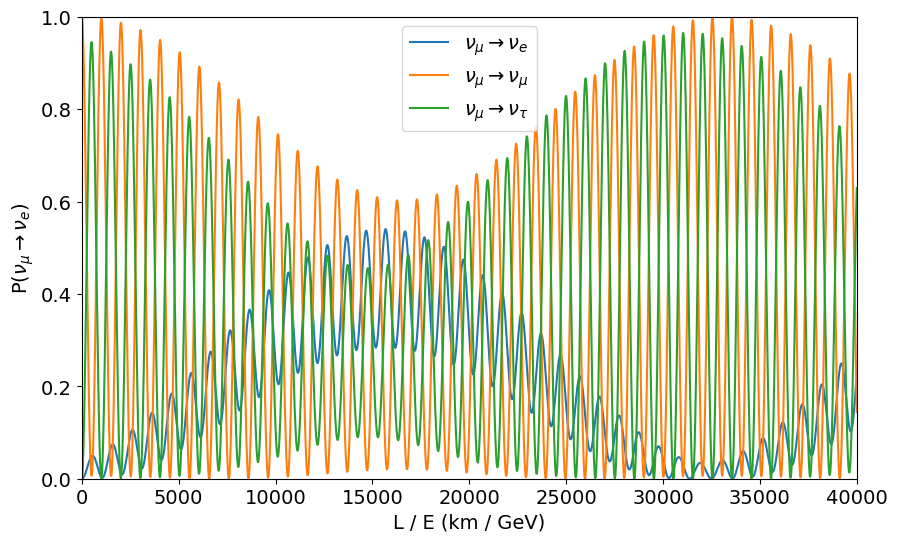

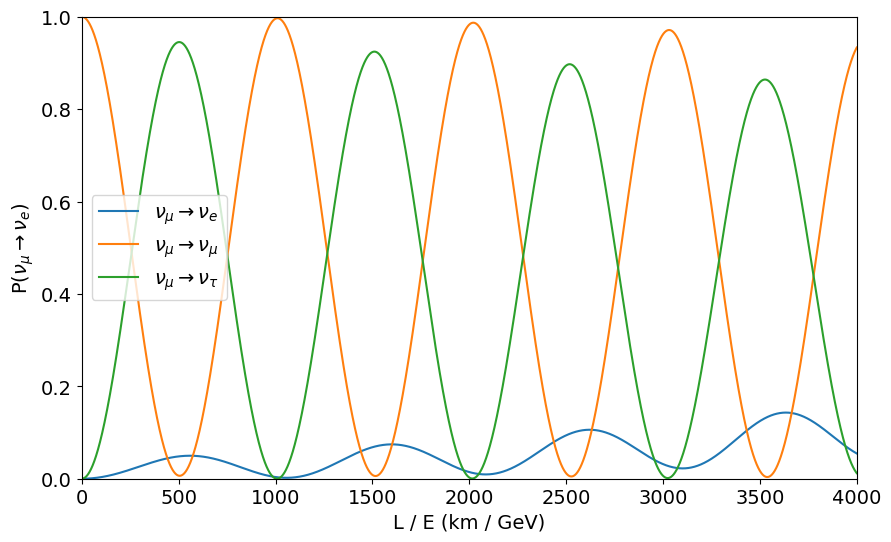

In [5]:
L_over_E_vals = np.linspace(0, 40000, 10000)
numu_to_nue_prob_vals = [get_prob("numu", "nue", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
numu_to_numu_prob_vals = [get_prob("numu", "numu", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
numu_to_nutau_prob_vals = [get_prob("numu", "nutau", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 6))
plt.plot(L_over_E_vals, numu_to_nue_prob_vals, label=r"$\nu_\mu \rightarrow \nu_e$")
plt.plot(L_over_E_vals, numu_to_numu_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\mu$")
plt.plot(L_over_E_vals, numu_to_nutau_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\tau$")
plt.xlim(L_over_E_vals[0], L_over_E_vals[-1])
plt.ylim(0, 1)
plt.xlabel("L / E (km / GeV)")
plt.ylabel(r"P($\nu_\mu \rightarrow \nu_e$)")
plt.legend()
plt.show()

L_over_E_vals = np.linspace(0, 4000, 10000)
numu_to_nue_prob_vals = [get_prob("numu", "nue", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
numu_to_numu_prob_vals = [get_prob("numu", "numu", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
numu_to_nutau_prob_vals = [get_prob("numu", "nutau", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 6))
plt.plot(L_over_E_vals, numu_to_nue_prob_vals, label=r"$\nu_\mu \rightarrow \nu_e$")
plt.plot(L_over_E_vals, numu_to_numu_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\mu$")
plt.plot(L_over_E_vals, numu_to_nutau_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\tau$")
plt.xlim(L_over_E_vals[0], L_over_E_vals[-1])
plt.ylim(0, 1)
plt.xlabel("L / E (km / GeV)")
plt.ylabel(r"P($\nu_\mu \rightarrow \nu_e$)")
plt.legend()
plt.show()


# Sterile

In [6]:
# ordering by equation 14: https://microboone.fnal.gov/wp-content/uploads/MICROBOONE-NOTE-1132-PUB.pdf
def get_sterile_PMNS(theta12, theta23, theta13, deltaCP, theta14, theta24, theta34, delta24, delta34):

    rot_23 = np.array([[
        [1, 0, 0, 0],
        [0, np.cos(theta23), np.sin(theta23), 0],
        [0, -np.sin(theta23), np.cos(theta23), 0],
        [0, 0, 0, 1]
        ]])

    rot_13 = np.array([[
        [np.cos(theta13), 0, np.sin(theta13)*np.exp(-1j*deltaCP), 0],
        [0, 1, 0, 0],
        [-np.sin(theta13)*np.exp(1j*deltaCP), 0, np.cos(theta13), 0],
        [0, 0, 0, 1]
        ]])

    rot_12 = np.array([[
        [np.cos(theta12), np.sin(theta12), 0, 0],
        [-np.sin(theta12), np.cos(theta12), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
        ]])
    
    rot_14 = np.array([[
        [np.cos(theta14), 0, 0, np.sin(theta14)],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [-np.sin(theta14), 0, 0, np.cos(theta14)]
        ]])
    
    rot_24 = np.array([[
        [1, 0, 0, 0],
        [0, np.cos(theta24), 0, np.sin(theta24)*np.exp(1j*delta24)],
        [0, 0, 1, 0],
        [0, -np.sin(theta24)*np.exp(-1j*delta24), 0, np.cos(theta24)]
        ]])
    
    rot_34 = np.array([[
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, np.cos(theta34), np.sin(theta34)*np.exp(1j*delta34)],
        [0, 0, -np.sin(theta34)*np.exp(-1j*delta34), np.cos(theta34)]
        ]])
    
    return (rot_14 @ rot_24 @ rot_34 @ rot_23 @ rot_13 @ rot_12)[0]

def get_sterile_prob(alpha, beta, L_over_E, U, m1, m2, m3, m4):

    if "anti" in alpha:
        sign = -1
    else:
        sign = 1

    if "anti" in alpha and not "anti" in beta:
        return 0

    P = 0
    if alpha == beta:
        P = 1
    for j in range(4):
        for k in range(4):
            if not (j > k):
                continue

            delta_m2_jk = [m1, m2, m3, m4][j]**2 - [m1, m2, m3, m4][k]**2

            # https://www.wolframalpha.com/input?i=GeV+fermi+%2F+%284+hbar+c%29
            P -= 4 * np.real(np.conj(U[(alpha,j)]) * U[(beta,j)] * U[(alpha,k)] * np.conj(U[(beta,k)])) * np.sin(1.26693268 * delta_m2_jk * L_over_E)**2
            P += sign * 2 * np.imag(np.conj(U[(alpha,j)]) * U[(beta,j)] * U[(alpha,k)] * np.conj(U[(beta,k)])) * np.sin(2 * 1.26693268 * delta_m2_jk * L_over_E)
            
    return P

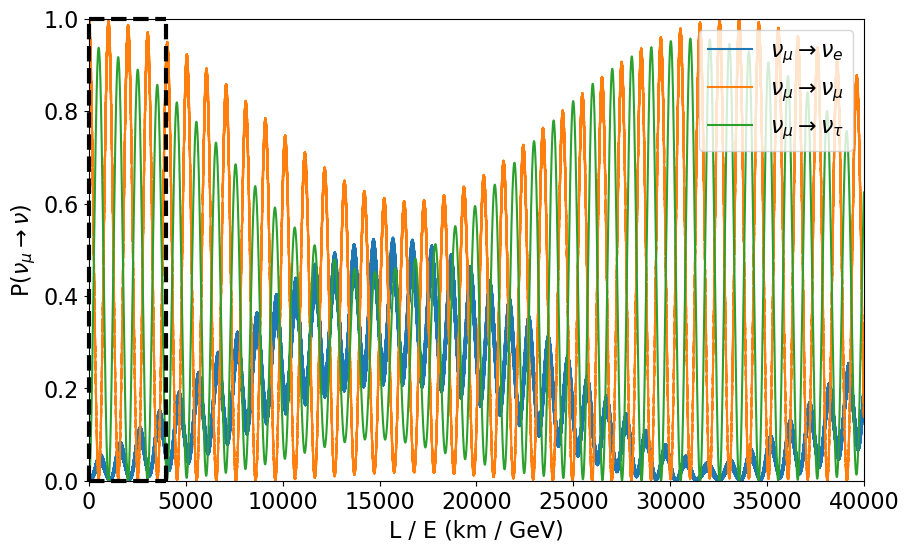

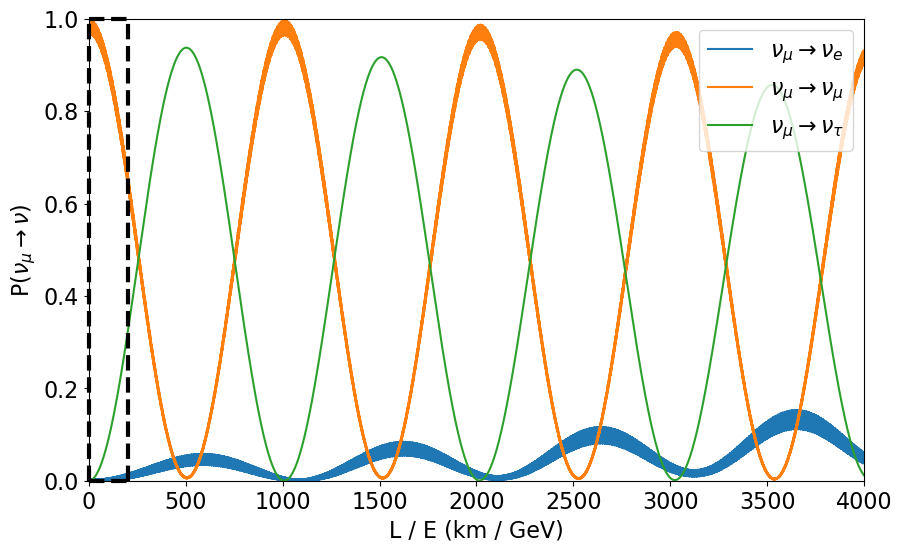

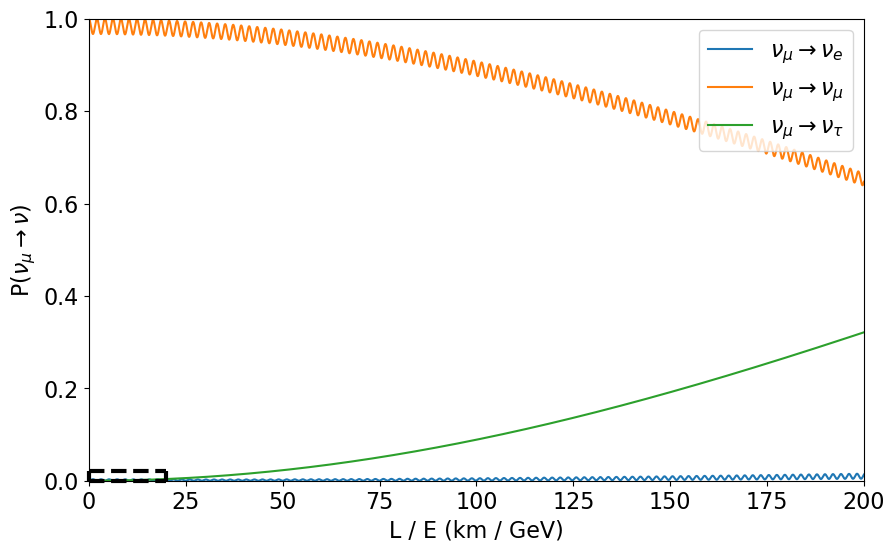

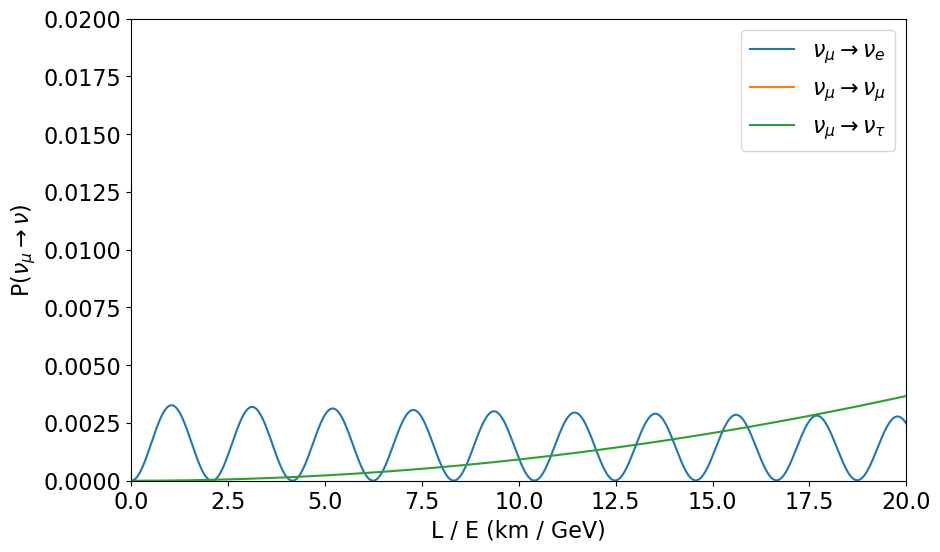

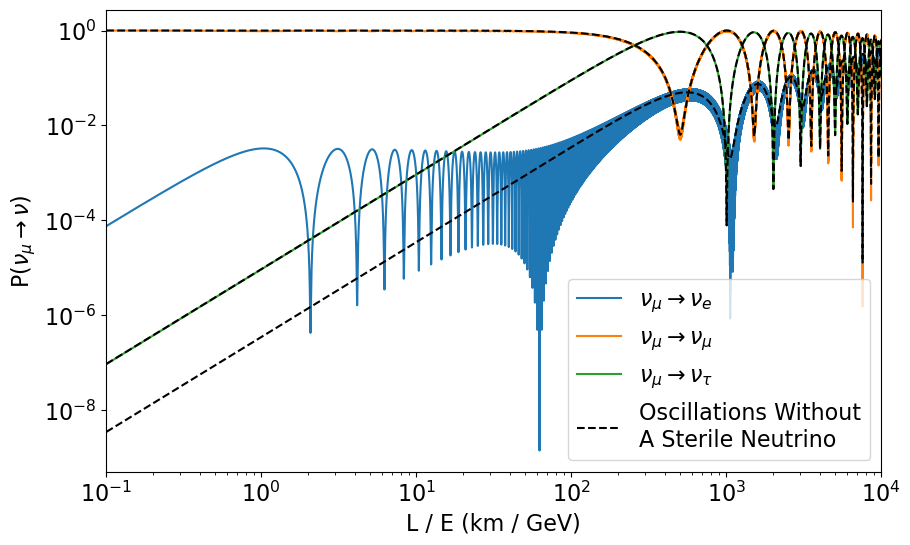

In [9]:
# LSND best-fit point:
sin2_2thetamue = 0.003
delta_m2_14 = 1.2

# these must multiply to sin2_2thetamue
sin2_2theta14 = 0.36 # matching a test point in https://journals.aps.org/prl/supplemental/10.1103/PhysRevLett.130.011801/Supplemental_uB_sterileNu_final.pdf
sin2_theta24 = sin2_2thetamue / sin2_2theta14
m4 = np.sqrt(delta_m2_14)

theta14 = np.arcsin(np.sqrt(sin2_2theta14)) / 2
theta24 = np.arcsin(np.sqrt(sin2_theta24))

theta34 = 0
delta24 = 0
delta34 = 0

U_mat = get_sterile_PMNS(theta12, theta23, theta13, deltaCP, theta14, theta24, theta34, delta24, delta34)

U_sterile = {}
for flavor_i in range(4):
    flavor = ["nue", "numu", "nutau", "nus"][flavor_i]
    for mass_i in range(4):
        U_sterile[(flavor, mass_i)] = U_mat[flavor_i, mass_i]

#print("implied sin2_2thetamue:", np.sin(2 * theta14)**2 * np.sin(theta24)**2, 4 * np.abs(U_sterile[("numu", 3)])**2 * np.abs(U_sterile[("nue", 3)])**2 )


def plot_dashed_line_box(lower_x, upper_x, lower_y, upper_y):

    width = upper_x - lower_x
    height = upper_y - lower_y
    epsilon = 0

    lower_x = lower_x + width * epsilon
    upper_x = upper_x - width * epsilon
    lower_y = lower_y + height * epsilon
    upper_y = upper_y - height * epsilon

    lw = 3

    plt.plot([lower_x, upper_x], [lower_y, lower_y], c="k", ls="--", lw=lw, clip_on=False)
    plt.plot([lower_x, upper_x], [upper_y, upper_y], c="k", ls="--", lw=lw, clip_on=False)
    plt.plot([lower_x, lower_x], [lower_y, upper_y], c="k", ls="--", lw=lw, clip_on=False)
    plt.plot([upper_x, upper_x], [lower_y, upper_y], c="k", ls="--", lw=lw, clip_on=False)

plt.rcParams.update({'font.size': 16})

L_over_E_vals = np.linspace(0, 40000, 100000)
numu_to_nue_prob_vals = [get_sterile_prob("numu", "nue", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
numu_to_numu_prob_vals = [get_sterile_prob("numu", "numu", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
numu_to_nutau_prob_vals = [get_sterile_prob("numu", "nutau", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
numu_to_nus_prob_vals = [get_sterile_prob("numu", "nus", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
no_sterile_numu_to_nue_prob_vals = [get_prob("numu", "nue", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
no_sterile_numu_to_numu_prob_vals = [get_prob("numu", "numu", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
no_sterile_numu_to_nutau_prob_vals = [get_prob("numu", "nutau", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
plt.figure(figsize=(10, 6))
plt.plot(L_over_E_vals, numu_to_nue_prob_vals, label=r"$\nu_\mu \rightarrow \nu_e$")
plt.plot(L_over_E_vals, numu_to_numu_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\mu$")
plt.plot(L_over_E_vals, numu_to_nutau_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\tau$")
#plt.plot(L_over_E_vals, no_sterile_numu_to_nue_prob_vals, label=r"$\nu_\mu \rightarrow \nu_e$ (no sterile)", c="k", ls="--")
#plt.plot(L_over_E_vals, no_sterile_numu_to_numu_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\mu$ (no sterile)", c="k", ls="--")
#plt.plot(L_over_E_vals, no_sterile_numu_to_nutau_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\tau$ (no sterile)", c="k", ls="--")
#plt.plot(L_over_E_vals, numu_to_nus_prob_vals, label=r"$\nu_\mu \rightarrow \nu_s$")
plt.xlim(L_over_E_vals[0], L_over_E_vals[-1])
plt.ylim(0, 1)
plt.xlabel("L / E (km / GeV)")
plt.ylabel(r"P($\nu_\mu \rightarrow \nu$)")
plt.legend(loc="upper right")
plot_dashed_line_box(0, 4000, 0, 1)
plt.savefig("plots/sterile_oscillation_zoom_0.pdf")

L_over_E_vals = np.linspace(0, 4000, 10000)
numu_to_nue_prob_vals = [get_sterile_prob("numu", "nue", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
numu_to_numu_prob_vals = [get_sterile_prob("numu", "numu", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
numu_to_nutau_prob_vals = [get_sterile_prob("numu", "nutau", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
numu_to_nus_prob_vals = [get_sterile_prob("numu", "nus", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
no_sterile_numu_to_nue_prob_vals = [get_prob("numu", "nue", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
no_sterile_numu_to_numu_prob_vals = [get_prob("numu", "numu", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
no_sterile_numu_to_nutau_prob_vals = [get_prob("numu", "nutau", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
plt.figure(figsize=(10, 6))
plt.plot(L_over_E_vals, numu_to_nue_prob_vals, label=r"$\nu_\mu \rightarrow \nu_e$")
plt.plot(L_over_E_vals, numu_to_numu_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\mu$")
plt.plot(L_over_E_vals, numu_to_nutau_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\tau$")
#plt.plot(L_over_E_vals, no_sterile_numu_to_nue_prob_vals, label=r"$\nu_\mu \rightarrow \nu_e$ (no sterile)", c="k", ls="--")
#plt.plot(L_over_E_vals, no_sterile_numu_to_numu_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\mu$ (no sterile)", c="k", ls="--")
#plt.plot(L_over_E_vals, no_sterile_numu_to_nutau_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\tau$ (no sterile)", c="k", ls="--")
#plt.plot(L_over_E_vals, numu_to_nus_prob_vals, label=r"$\nu_\mu \rightarrow \nu_s$")
plt.xlim(L_over_E_vals[0], L_over_E_vals[-1])
plt.ylim(0, 1)
plt.xlabel("L / E (km / GeV)")
plt.ylabel(r"P($\nu_\mu \rightarrow \nu$)")
plt.legend(loc="upper right")
plot_dashed_line_box(0, 200, 0, 1)
plt.savefig("plots/sterile_oscillation_zoom_1.pdf")
L_over_E_vals = np.linspace(0, 200, 10000)
numu_to_nue_prob_vals = [get_sterile_prob("numu", "nue", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
numu_to_numu_prob_vals = [get_sterile_prob("numu", "numu", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
numu_to_nutau_prob_vals = [get_sterile_prob("numu", "nutau", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
numu_to_nus_prob_vals = [get_sterile_prob("numu", "nus", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
no_sterile_numu_to_nue_prob_vals = [get_prob("numu", "nue", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
no_sterile_numu_to_numu_prob_vals = [get_prob("numu", "numu", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
no_sterile_numu_to_nutau_prob_vals = [get_prob("numu", "nutau", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
plt.figure(figsize=(10, 6))
plt.plot(L_over_E_vals, numu_to_nue_prob_vals, label=r"$\nu_\mu \rightarrow \nu_e$")
plt.plot(L_over_E_vals, numu_to_numu_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\mu$")
plt.plot(L_over_E_vals, numu_to_nutau_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\tau$")
#plt.plot(L_over_E_vals, no_sterile_numu_to_nue_prob_vals, label=r"$\nu_\mu \rightarrow \nu_e$ (no sterile)", c="k", ls="--")
#plt.plot(L_over_E_vals, no_sterile_numu_to_numu_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\mu$ (no sterile)", c="k", ls="--")
#plt.plot(L_over_E_vals, no_sterile_numu_to_nutau_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\tau$ (no sterile)", c="k", ls="--")
#plt.plot(L_over_E_vals, numu_to_nus_prob_vals, label=r"$\nu_\mu \rightarrow \nu_s$")
plt.xlim(L_over_E_vals[0], L_over_E_vals[-1])
plt.ylim(0, 1)
plt.xlabel("L / E (km / GeV)")
plt.ylabel(r"P($\nu_\mu \rightarrow \nu$)")
plt.legend(loc="upper right")
plot_dashed_line_box(0, 20, 0, 0.02)
plt.savefig("plots/sterile_oscillation_zoom_2.pdf")

L_over_E_vals = np.linspace(0, 20, 10000)
numu_to_nue_prob_vals = [get_sterile_prob("numu", "nue", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
numu_to_numu_prob_vals = [get_sterile_prob("numu", "numu", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
numu_to_nutau_prob_vals = [get_sterile_prob("numu", "nutau", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
numu_to_nus_prob_vals = [get_sterile_prob("numu", "nus", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
no_sterile_numu_to_nue_prob_vals = [get_prob("numu", "nue", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
no_sterile_numu_to_numu_prob_vals = [get_prob("numu", "numu", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
no_sterile_numu_to_nutau_prob_vals = [get_prob("numu", "nutau", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
plt.figure(figsize=(10, 6))
plt.plot(L_over_E_vals, numu_to_nue_prob_vals, label=r"$\nu_\mu \rightarrow \nu_e$")
plt.plot(L_over_E_vals, numu_to_numu_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\mu$")
plt.plot(L_over_E_vals, numu_to_nutau_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\tau$")
#plt.plot(L_over_E_vals, no_sterile_numu_to_nue_prob_vals, label=r"$\nu_\mu \rightarrow \nu_e$ (no sterile)", c="k", ls="--")
#plt.plot(L_over_E_vals, no_sterile_numu_to_numu_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\mu$ (no sterile)", c="k", ls="--")
#plt.plot(L_over_E_vals, no_sterile_numu_to_nutau_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\tau$ (no sterile)", c="k", ls="--")
#plt.plot(L_over_E_vals, numu_to_nus_prob_vals, label=r"$\nu_\mu \rightarrow \nu_s$")
plt.xlim(L_over_E_vals[0], L_over_E_vals[-1])
plt.ylim(0, 0.02)
plt.xlabel("L / E (km / GeV)")
plt.ylabel(r"P($\nu_\mu \rightarrow \nu$)")
plt.legend(loc="upper right")
plt.savefig("plots/sterile_oscillation_zoom_3.pdf")


L_over_E_vals = np.logspace(-1, 4, 100000)
numu_to_nue_prob_vals = [get_sterile_prob("numu", "nue", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
numu_to_numu_prob_vals = [get_sterile_prob("numu", "numu", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
numu_to_nutau_prob_vals = [get_sterile_prob("numu", "nutau", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
numu_to_nus_prob_vals = [get_sterile_prob("numu", "nus", L_over_E, U_sterile, m1, m2, m3, m4) for L_over_E in L_over_E_vals]
no_sterile_numu_to_nue_prob_vals = [get_prob("numu", "nue", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
no_sterile_numu_to_numu_prob_vals = [get_prob("numu", "numu", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
no_sterile_numu_to_nutau_prob_vals = [get_prob("numu", "nutau", L_over_E, U, m1, m2, m3) for L_over_E in L_over_E_vals]
plt.figure(figsize=(10, 6))
plt.plot(L_over_E_vals, numu_to_nue_prob_vals, label=r"$\nu_\mu \rightarrow \nu_e$")
plt.plot(L_over_E_vals, numu_to_numu_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\mu$")
plt.plot(L_over_E_vals, numu_to_nutau_prob_vals, label=r"$\nu_\mu \rightarrow \nu_\tau$")
plt.plot(L_over_E_vals, no_sterile_numu_to_nue_prob_vals, label="Oscillations Without\nA Sterile Neutrino", c="k", ls="--")
plt.plot(L_over_E_vals, no_sterile_numu_to_numu_prob_vals, c="k", ls="--")
plt.plot(L_over_E_vals, no_sterile_numu_to_nutau_prob_vals, c="k", ls="--")
plt.xlim(L_over_E_vals[0], L_over_E_vals[-1])
plt.yscale("log")
plt.xlabel("L / E (km / GeV)")
plt.xscale("log")
plt.ylabel(r"P($\nu_\mu \rightarrow \nu$)")
plt.legend(loc="lower right")
plt.savefig("plots/sterile_oscillation_log.pdf")